# Chapter 03. Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 신경망 Neural Network 

### 1.1. 퍼셉트론과 신경망

<img src='./2_nn.JPG' width=30%>

퍼셉트론은 복잡한 함수도 표현할 수 있지만, weight를 정하는 것을 사람이 스스로해야 한다는 단점이 있다. 하지만, 신경망은 weight를 데이터 학습을 통해서 알아서 정해준다. 신경망은 아래와 같이 맨 왼쪽에 위치한 **입력층**, 중간에 위치한 **은닉충** 그리고 맨 오른쪽에 위치한 **출력층**으로 나눌 수 있다.    

이 때 입력층의 경우 weight를 갖지 않으므로 **2층 신경망**이라 볼 수 있다.

### 1.2. 활성화 함수
활성화 함수는 입력 신호의 합(sum)을 출력 신호로 변환하는 함수를 말한다. 이 활성화 함수는 **임계값**을 경계로 출력이 바뀐다.
* weight가 달린 입력 신호와 편향의 총합을 구한다.
* 이 총합을 활성화 함수인 $h(x)$에 넣어 출력 신호를 구한다.

#### 1.2.1. 시그모이드 함수 vs 계단함수
시그모이드(sigmoid) 함수 $h(x) = \frac{1}{1+exp(-x)}$는 **S자 모양**을 한 함수를 말한다. 시그모이드 함수는 다음과 같은 특성을 가지고 있다.
* 부드러운 곡선이고 입력에 따라 출력이 연속적으로 변화
* 출력 신호로 0과 1사이의 실수 값을 반환    

시그모이드(sigmoid) 함수와 $tanh$ 함수의 관계 : $tanh(x) = 2sigmoid(2x) - 1$

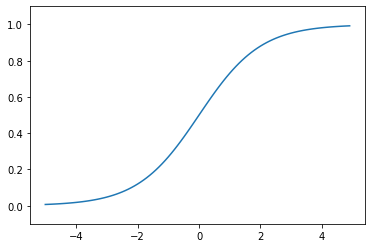

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

계단(step) 함수 $h(x) = \begin{cases}1 & x \geq 0\\0 & x < 0\end{cases}$는 계단 모양을 한 함수를 말한다. 단순히 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력한다. 
* 0을 경계로 출력이 0에서 1(or 1에서 0)으로 변화
* 0 또는 1 중 하나의 값만 반환

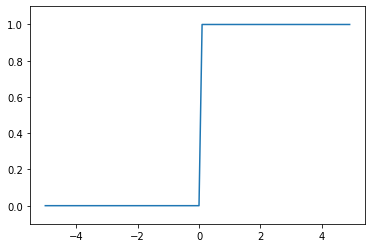

In [4]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

두 함수 차이점이 있지만 **공통점**이 존재한다.
* 입력이 작을 때 출력은 0에 가깝고, 입력이 커질 때 출력이 1에 가까워진다.
* 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력한다.

#### 1.2.2. 비선형 함수
**곡선** 모양의 시그모이드(sigmoid) 함수와 **계단**처럼 구부러진 직선인 계단(step) 함수는 **비선형 함수**로 분류된다. 이 비선형 함수는 신경망에서 정말 중요한다. 신경망에서 선형 함수를 쓸 경우 **신경망을 여러 층으로 구성하는 장점**을 살릴 수가 없다.    
예를 들어, $h(x) = cx$라는 활성화 함수가 있다고 하면, 3개의 층을 쌓았을 때 출력은 $y = h(h(h(x))) = c^3x$이다. $c^3 = a$로 치환을 하면 결국에는 1개의 층을 쌓은 신경망과 똑같아진다.

#### 1.2.3. ReLU 함수
ReLU 함수 $h(x) = \begin{cases}x & x > 0\\0 & x \leq 0\end{cases}$는 입력이 0이 넘으면 그대로 출력하고 0 이하면 0을 출력하는 함수를 말한다. 최근에는 ReLU 함수를 신경망에서 주로 사용한다고 한다.

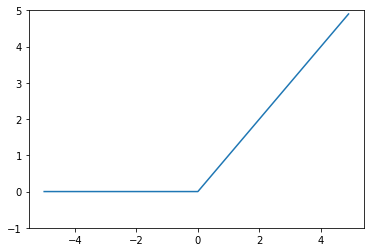

In [5]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5)
plt.show()

### 1.3. 출력층
출력층은 최종 출력을 할 때의 층을 말한다. 이 출력층의 활성화 함수는 **풀고자 하는 문제의 성질**에 맞추어 정해야 한다.     
출력층의 활성화 함수는 $\sigma(x)$로 나타낸다.
* **회귀(regression)** : 항등 함수(identity function)
* **2 클래스 분류(2 class classification)** : 시그모이드 함수(sigmoid function)
* **다중 클래스 분류(multi class classification)** : 소프트맥스 함수(softmax function)

#### 1.3.1. 항등 함수 identity function
<img src='./identity_func.jpg' width=15%>

항등 함수(identity function)은 입력을 그대로 출력하는 함수를 말한다.

In [6]:
def identity_function(x):
    return x

#### 1.3.2. 소프트맥스 함수 softmax function

<img src='./softmax_func.jpg' width=15%>

소프트맥스 함수(softmax function)은 $y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^n exp(a_{i})}$이다. 
* $n$ : 출력층의 뉴런 수
* $y_k$ : 그 중 $k$번째 출력 신호
* $a_k$ : $k$번째 입력 신호

소프트맥스 함수는 $e^x$ 지수함수를 사용하는데 입력값이 커질수록 출력값이 기하급수적으로 커진다. 그렇게 되면 **오버플로우 문제**가 발생하게 되는 데 이를 방지하기 위해 상수 $C$를 분모 분자에 곱해준다.     
그러면 아래와 같이 나타낼 수 있는데 **소프트맥스 지수 함수의 지수 부분에 어떤 정수를 더하더라도 결과는 바뀌지 않는다**는 것을 알 수 있다.

$$y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^n exp(a_{i})} = \frac{Cexp(a_{k})}{C\sum_{i=1}^n exp(a_{i})} = \frac{exp(a_{k}+\log{C})}{\sum_{i=1}^n exp(a_{i}+\log{C})}
= \frac{exp(a_{k}+C')}{\sum_{i=1}^n exp(a_{i}+C')}$$

In [7]:
def softmax(a):
    c = np.max(a)    # 입력으로 받는 a 배열의 가장 큰 수를 상수로 지정
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([1010, 1000, 990])
y = softmax(a)
y

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

소프트맥스 함수의 출력을 보면 **입력의 대소관계가 유지**되는 것을 알 수 있다. 즉, 소프트맥스 함수의 출력을 **확률**로 생각할 수 있다. 그래서 **신경망을 이용한 분류**에서 가장 큰 출력을 가진 노드를 해당 클래스로 인식하는데 대소관계가 그대로 유지되므로 **출력층의 소프트맥스 함수를 생략**하는 것이 일반적이다.

## 2. 3층 신경망 구현

<img src='./3_nn.jpg' width=50%>

### 2.1. 표기법
<img src='./presentation_nn.JPG' width=40%>

* $x_2$ : **입력층**의 두 번째 뉴런
* $a_2^{(1)}$ : **1번째 은닉층**의 두 번째 뉴런
* $w_{1 2}^{(1)}$ : **입력층(0)**의 두 번째 뉴런에서 **은닉층(1)**의 첫 번째 뉴런으로의 가중치

### 2.2. 신호를 다음 층으로 전달하기
모든 층은 다음과 같은 과정을 거친다. 입력에 가중치를 곱해 편행을 더한 총합을 구한다. 그리고 그 총합을 활성화 함수에 넣어 구한 출력을 구한 뒤 그것을 다음 뉴런의 입력으로 넣는다.

* 입력층(0) → 은닉층(1) : $h(A^{(1)} = XW^{(1)} + B_{(1)})$
* 은닉층(1) → 은닉층(2) : $h(A^{(2)} = XW^{(2)} + B_{(2)})$
* 은닉층(2) → 출력층(3) : $\sigma(A^{(3)} = XW^{(3)} + B_{(3)})$

### 2.3. 구현

In [8]:
# 가중치와 편향을 초기화하여 network에 저장
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 순방향으로 입력을 출력으로 변환
def forward(network, x):    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [9]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 3. 손글씨 숫자 인식
신경망은 두 단계를 거쳐서 문제를 해결한다.
* **학습** : 학습 데이터를 이용해 weight를 학습
* **추론** : 학습한 weight를 이용하여 입력 데이터를 분류

### 3.1. MNIST 데이터셋
0부터 9까지의 숫자 이미지로, train 이미지 60000장 그리고 test 이미지가 10000장이 준비되어 있다.
* `28*28` 크기의 **회색조** 이미지(1채널)로, 각 픽셀값이 `0 - 255`
* 각 이미지에 실제 의미한 숫자가 **레이블**이 붙어 있음

### 3.2. 데이터셋 불러오기
`load_mnist`로 데이터를 불러올 수 있다. 처음 호출 시 **인터넷에서 데이터를 로드**하고, 두 번째 호출부터는 **로컬에 저장된 `pickle` 파일을 로드**한다.
* `normalize` : **True**면 이미지 픽셀을 **0.0 ~ 1.0** 사이의 값을 정규화, **False**면 픽셀 원래값인 **0 ~ 255**
* `flatten` : **True**면 이미지 크기를 **784**개의 원소로 이루어진 1차원 배열로 변환, **False**면 **1×28×28**인 3차원 배열 그대로
* `one_hot_label` : **True**면 레이블을 **원-핫 인코딩**으로 변환, **False**면 레이블 그대로

In [10]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# (train 이미지, train 이미지의 레이블), (test 이미지, test 이미지의 레이블)
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 크기 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 3.3. 이미지 출력하기
`PIL(Python Image Libary)` 모듈을 이용해 화면에 이미지를 표시할 수 있다.

In [16]:
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    # pil_img.show()
    imshow(np.asarray(pil_img))
    
    
img = x_train[0]
label = t_train[0]
label

5

(784,)
(28, 28)


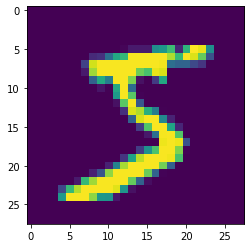

In [17]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

### 3.4. 레이블 추론하기
아래와 같이 3층 신경망을 구현한다. 이 때 은닉층의 뉴런의 수는 임의로 정한 값이다.
* 입력층(0) : 784개의 뉴런 (`28×28` px)
* 은닉층(1) : 50개의 뉴런 
* 은닉층(2) : 100개의 뉴런 
* 출력층(3) : 10개의 뉴런 (`[0-9]`)

In [33]:
import pickle

# 데이터 로드를 한 뒤 train set과 test set으로 분리
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# sample_weight.pkl에 저장된 weight와 bias를 불러옴
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

# 3층 신경망 구성
def predict(network, x):    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [34]:
x, t = get_data()         # 데이터 로드
network = init_network()  # weight와 bias

accuracy_cnt = 0          # 정확도 계산을 위한 카운트 : 맞춘 데이터 개수
for i in range(len(x)):
    y = predict(network, x[i])
    # 확률이 가장 높은 것의 인덱스 = 인식한 숫자
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print('Accuracy :', str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


**전처리**는 입력 데이터에 특정 변환을 가한 것이다. 전처리를 통해서 식별 능력을 개선하고 학습 속도를 높일 수 있다. 보통 **데이터 전체의 분포**를 고려해 전처리하는 경우가 많다.
* **정규화** : 데이터를 특정 범위로 변환하는 처리
* **백색화** : 데이터를 균일하게 분포시킴

### 3.5. 배치 처리
<img src='./batch.JPG' width=50%>

배치란 **하나로 묶은 입력 데이터**를 말한다. 즉, `10000`개의 `28×28`px의 이미지 데이터가 있다 할 때 `10000×784` 로 묶는 것과 같다. 출력은 **입력 데이터의 개수와 레이블 개수를 곱한 것**이다. 즉, `10000×10`이 된다.
* `이유1` : 대부분의 라이브러리가 큰 배열을 효율적으로 처리할 수 있도록 최적화 되어 있어서
* `이유2` : 배치 처리를 함으로써 다음 신경망으로 데이터를 넘길 때 부하를 줄일 수 있어서

요약하자면 데이터 하나씩 처리하지말고 많이 묶어서 한꺼번에 처리하자는 말이다.

In [35]:
x, t = get_data()         # 데이터 로드
network = init_network()  # weight와 bias

batch_size = 100          # 100개씩 묶어서 계산
accuracy_cnt = 0          # 정확도 계산을 위한 카운트 : 맞춘 데이터 개수
for i in range(0, len(x), batch_size):
    # 100 * 784
    x_batch = x[i:i+batch_size]    # 0-99, 100-199, ...
    # 100 * 10
    y_batch = predict(network, x_batch)
    
    # 확률이 가장 높은 것의 인덱스 = 인식한 숫자
    # 각 행(=각 데이터)의 가장 큰 확률을 가진 인덱스를 반환
    # 100 * 1 크기의 배열이 반환
    p = np.argmax(y_batch, axis=1) 
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
        
print('Accuracy :', str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352
